In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-dataset/telco.csv


In [5]:
df = pd.read_csv('/kaggle/input/telecom-dataset/telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Starting data cleansing process.

In [2]:
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
dfcopy = df.copy()

In [8]:
dfcopy.TotalCharges = pd.to_numeric(dfcopy.TotalCharges, errors='coerce')
dfcopy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are NaN values in the TotalCharges Column, so we have to drop those as not much information will be lost due to it.

In [9]:
dfcopy.dropna(how = 'any', inplace = True)

Now splitting the tenures into buckets for better understanding and data representation.

In [10]:
print(dfcopy['tenure'].max()) 

72


So, the maximum range of tenure in this dataset is 72 months.

In [11]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
dfcopy['tenure_group'] = pd.cut(dfcopy.tenure, range(1, 80, 12), right=False, labels=labels)

dfcopy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Now dropping duplicated columns and other useless data in the columns.

In [12]:
dfcopy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
dfcopy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Exploring Churn Rates

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


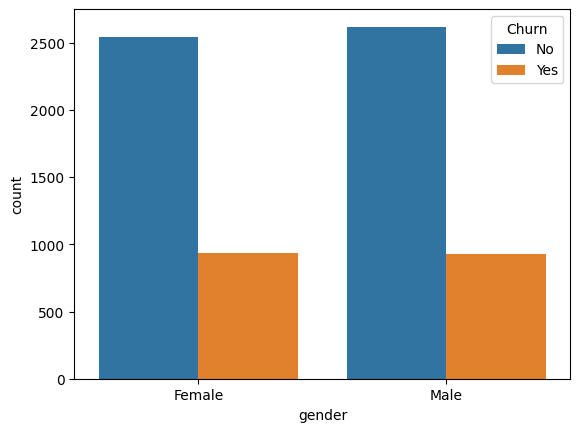

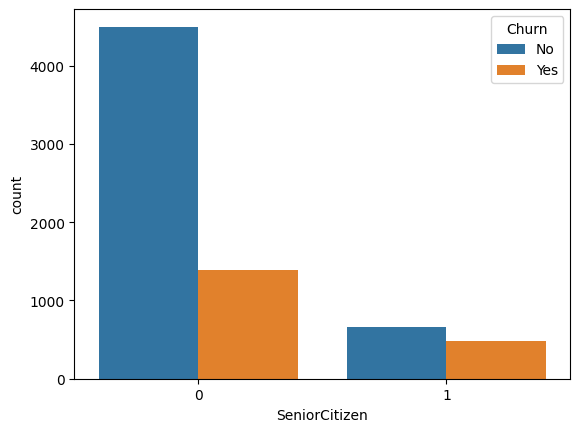

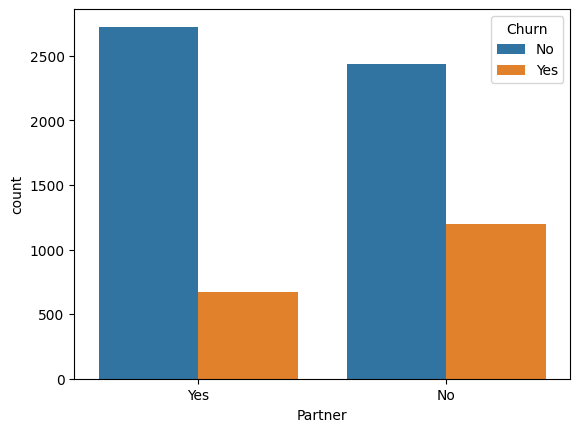

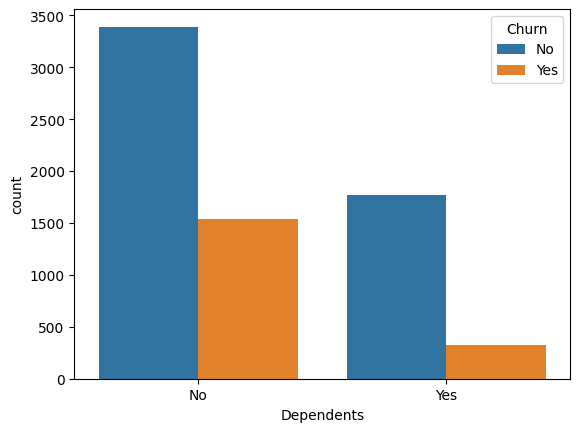

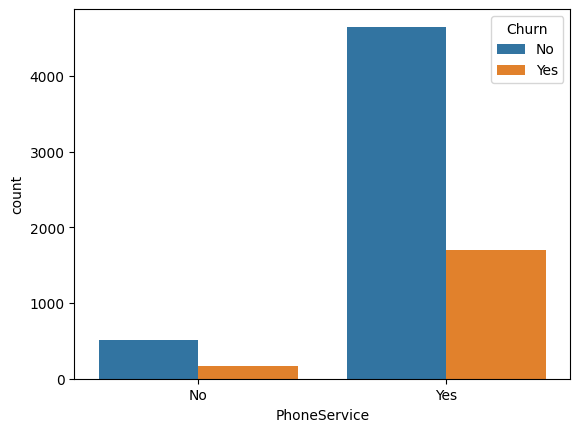

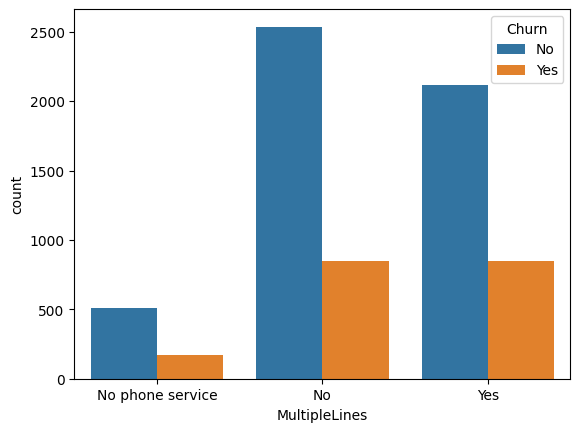

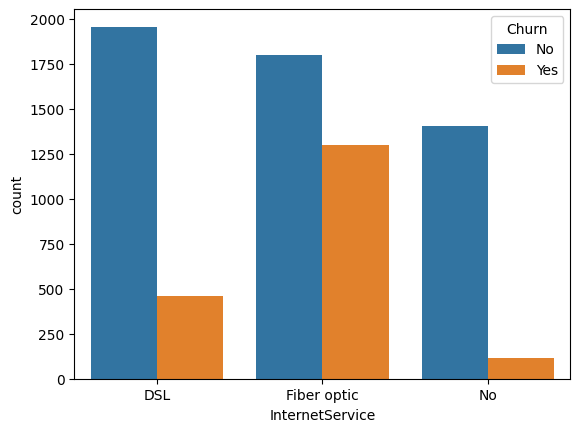

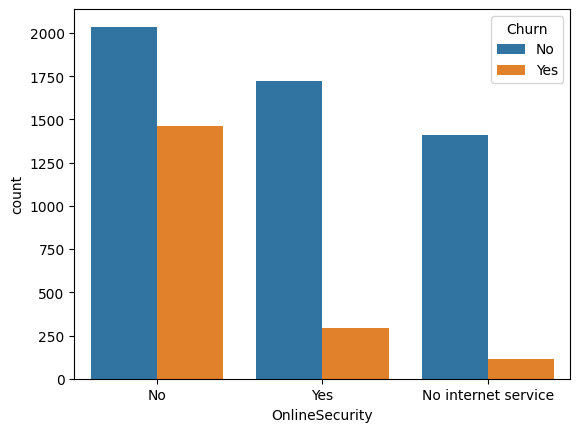

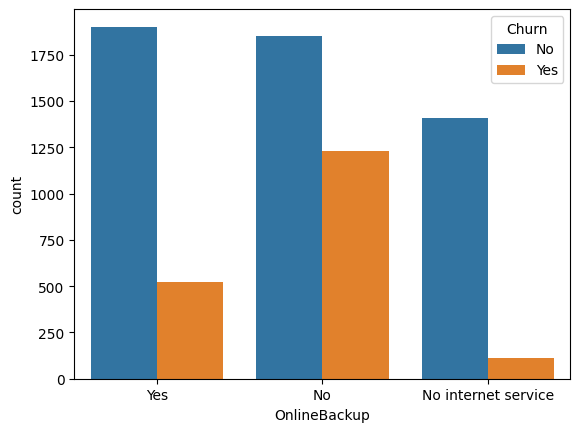

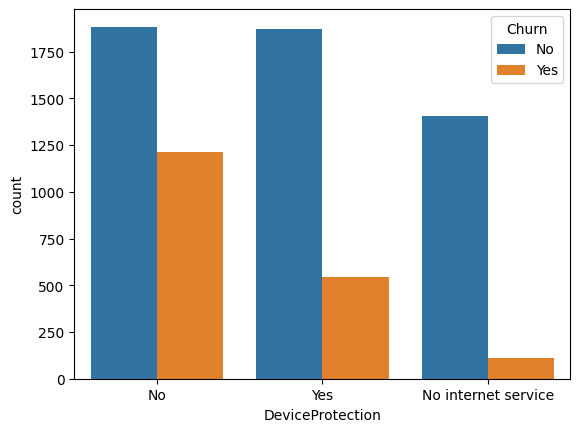

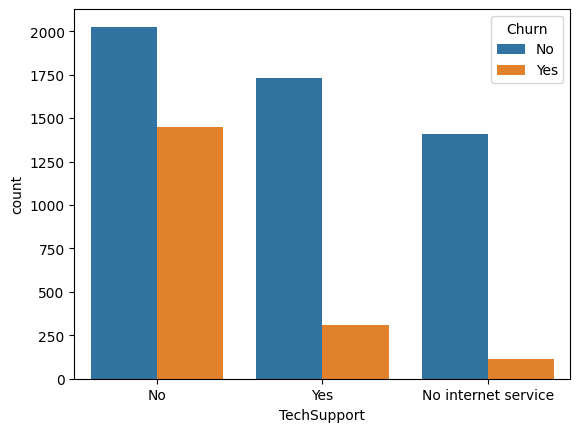

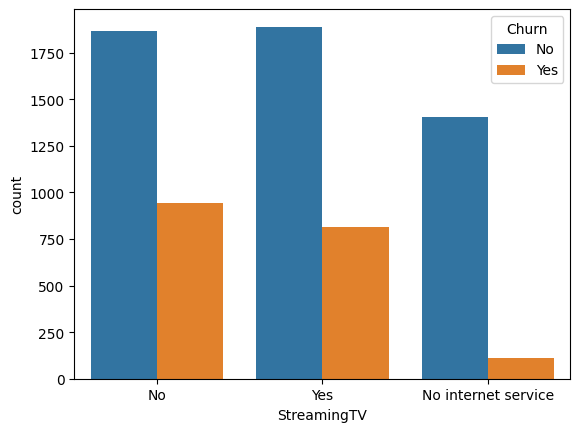

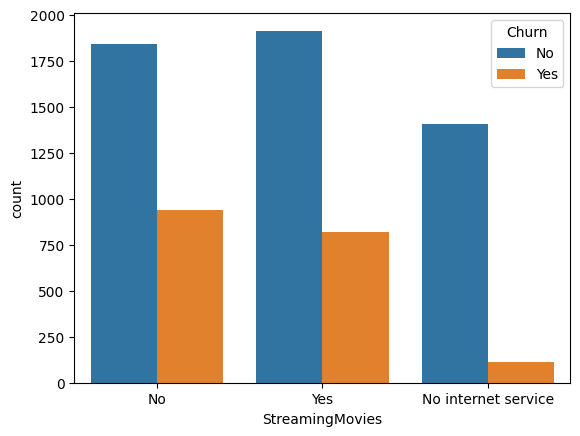

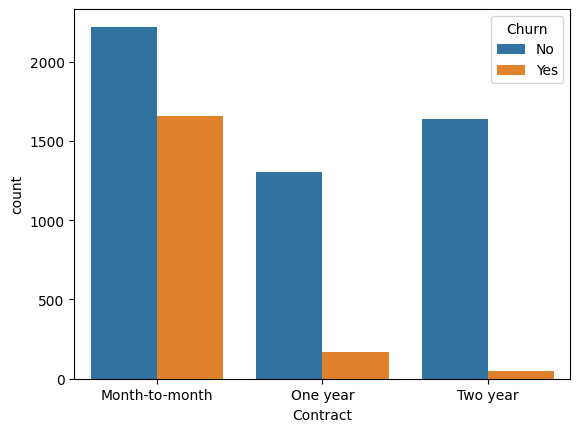

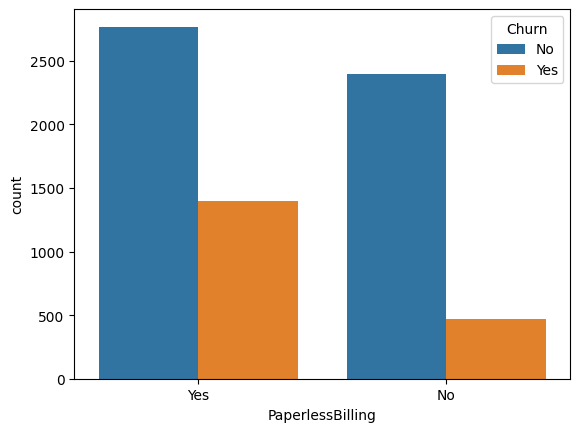

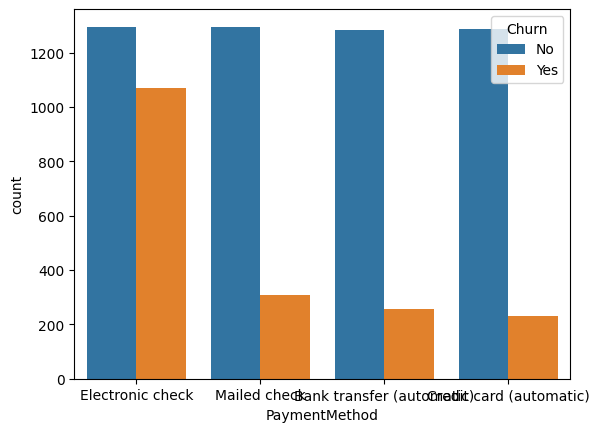

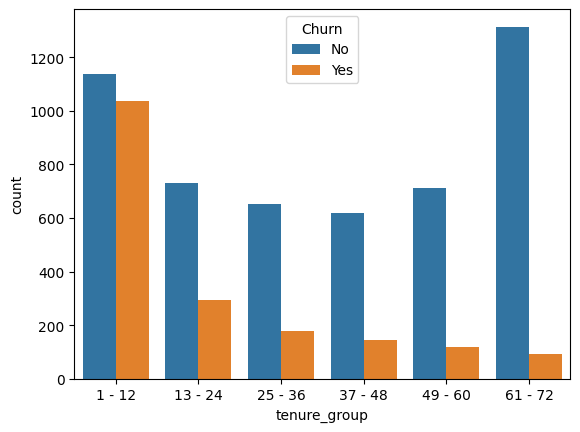

In [13]:
for i, predictor in enumerate(dfcopy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=dfcopy, x=predictor, hue='Churn')

The churn rate is most of the electronic check in the Payment Methods when compared to the other three. It is more than the other three summed together.
The churn rate decreases with increasing tenure duration. The maximum churn is seen in the 1-12 group, which is more than 1000 people.

Next, we are going to segment the customers into different categories and analyse the churn rate within them.

In [14]:
def biplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 10
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 1*len(temp.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [15]:
dfcopy['Churn'] = np.where(dfcopy.Churn == 'Yes',1,0)
dfcopy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Above, we have defined a function to plot bar charts and have renamed Churns with 'yes' as 1 and others as 0.
Now, analysis based on contract, tenure and monthly charges is done separately based on whether churned or not.

In [16]:
Churned = dfcopy.loc[dfcopy['Churn'] == 1]
noChurn = dfcopy.loc[dfcopy['Churn'] == 0]

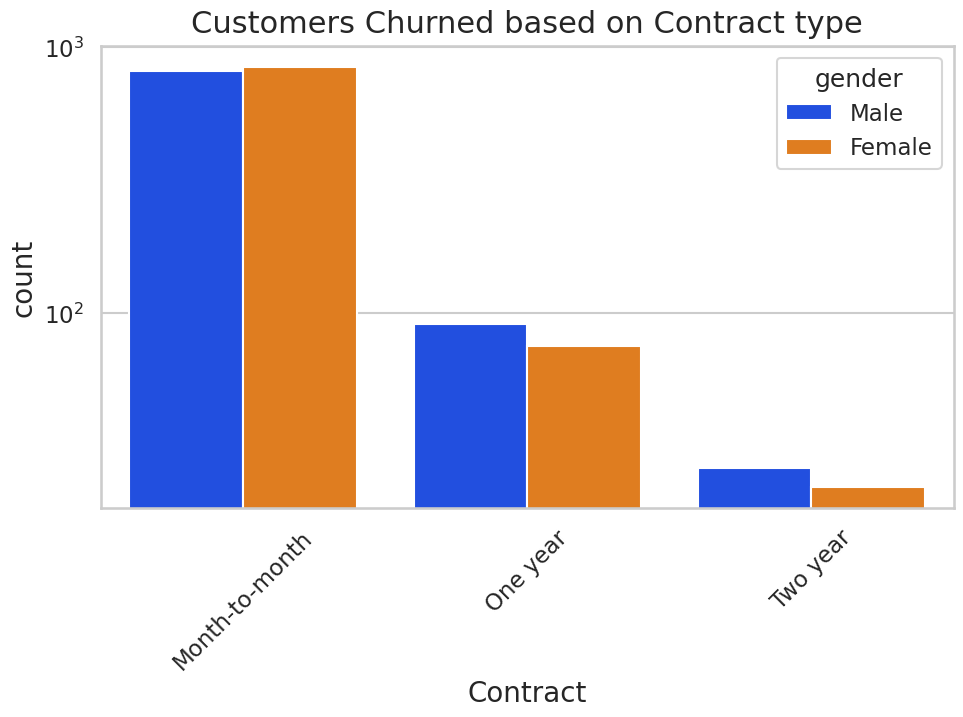

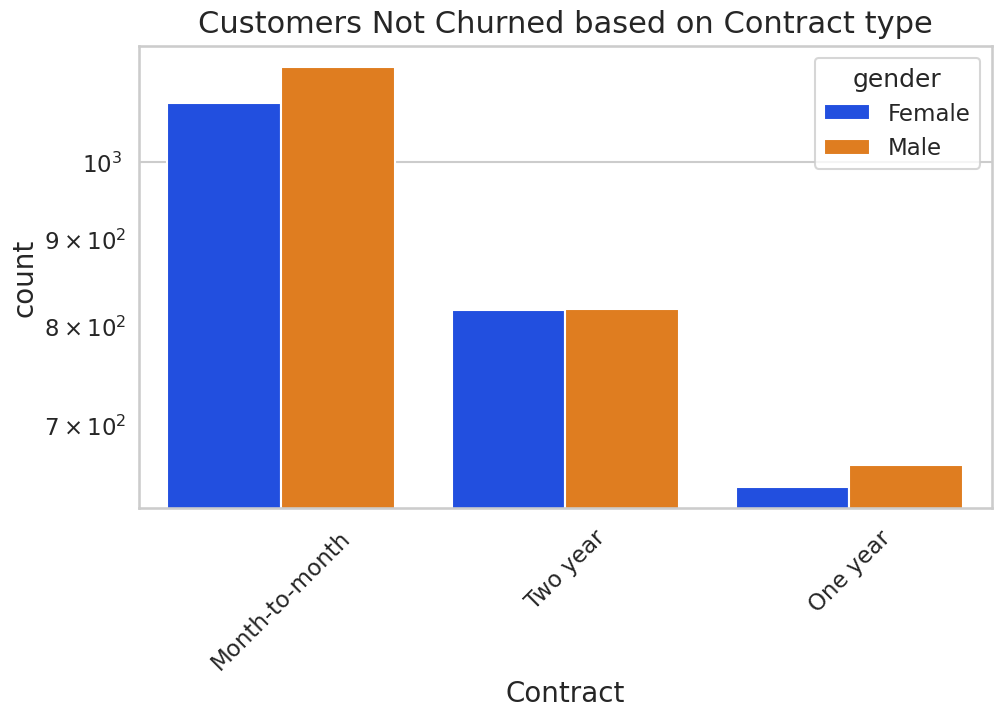

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


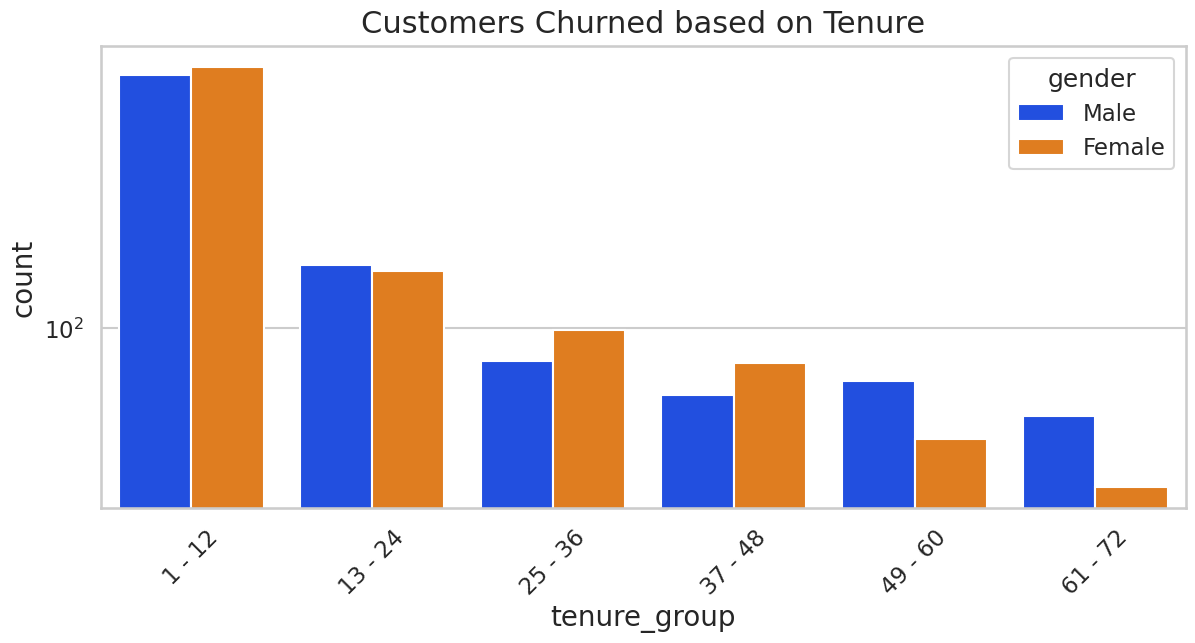

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


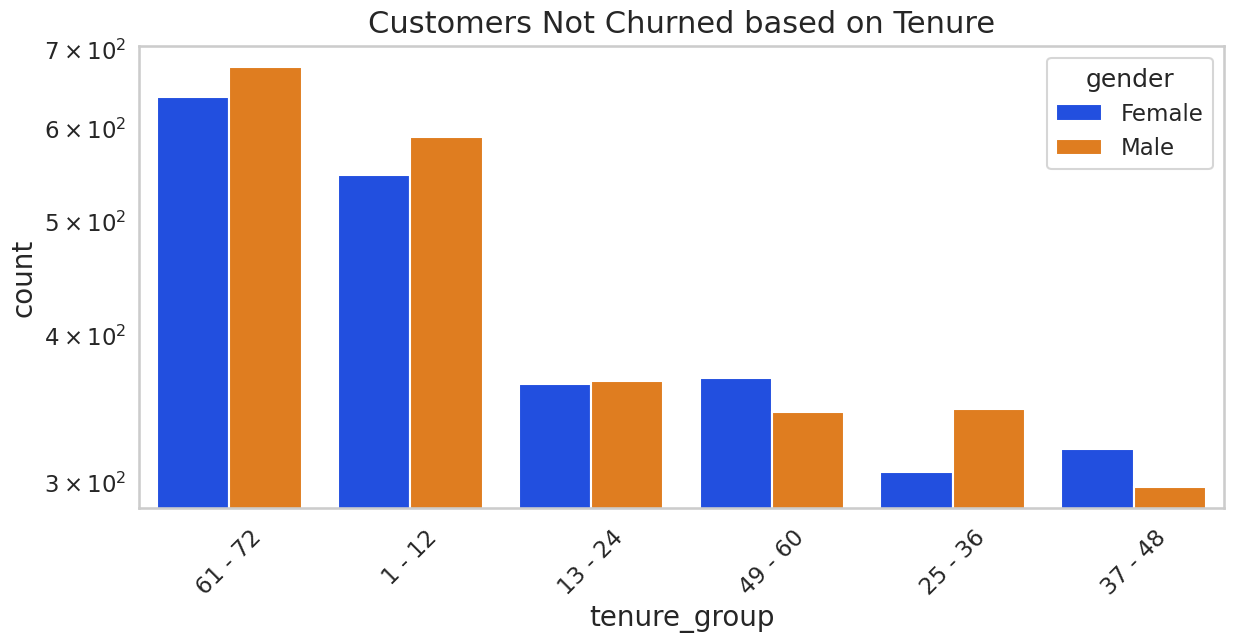

In [17]:
biplot(Churned,col='Contract',title='Customers Churned based on Contract type',hue='gender')
biplot(noChurn,col='Contract',title='Customers Not Churned based on Contract type',hue='gender')
biplot(Churned,col='tenure_group',title='Customers Churned based on Tenure',hue='gender')
biplot(noChurn,col='tenure_group',title='Customers Not Churned based on Tenure',hue='gender')

In [18]:
dfcopyDummies = pd.get_dummies(dfcopy)
dfcopyDummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly charges by churn')

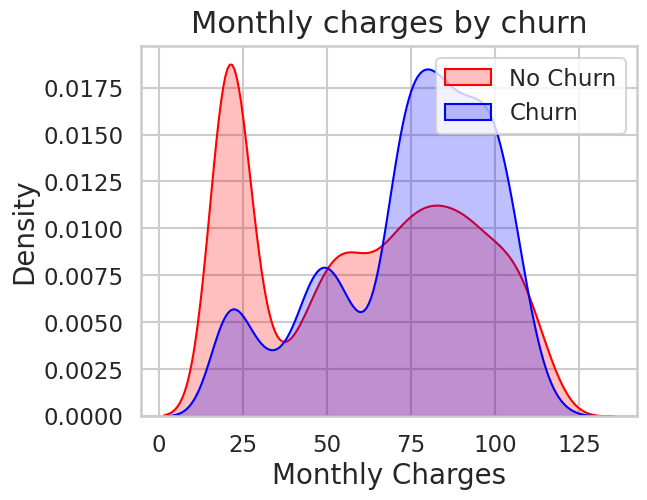

In [19]:
Mth = sns.kdeplot(dfcopyDummies.MonthlyCharges[(dfcopyDummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(dfcopyDummies.MonthlyCharges[(dfcopyDummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

# Model Creation

With the completion of task 1, 2 and 3, we are moving forward with the creation of a model for prediction.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

Various models have been imported from which the best would be selected. The smoteenn module is used to make the dataset more balanced which would make the models perform much better than their initial performance.

In [27]:
df = dfcopyDummies
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 non-nul

In [39]:
x = df.drop('Churn', axis = 1)
y = df['Churn']
smotenn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smotenn.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

The given sample has been balanced and split into training and testing datasets.
Now, we fit different models to the dataset and use the one which gives the best score.

In [50]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

a = 0
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'--- {name} ---')
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
    score  = model.score(x_test, y_test)
    print("Score : ", score)
    print(classification_report(y_test, y_pred))
    
    if (score > a):
        a = score
        model_save = model
    

--- Logistic Regression ---
Confusion Matrix : 
 [[532  21]
 [ 37 592]]
Score :  0.9509306260575296
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       553
           1       0.97      0.94      0.95       629

    accuracy                           0.95      1182
   macro avg       0.95      0.95      0.95      1182
weighted avg       0.95      0.95      0.95      1182

--- Random Forest ---
Confusion Matrix : 
 [[534  19]
 [ 23 606]]
Score :  0.9644670050761421
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       553
           1       0.97      0.96      0.97       629

    accuracy                           0.96      1182
   macro avg       0.96      0.96      0.96      1182
weighted avg       0.96      0.96      0.96      1182

--- XGBoost ---
Confusion Matrix : 
 [[537  16]
 [ 22 607]]
Score :  0.9678510998307953
              precision    recall  f1-score   support

         

In [52]:
import pickle
filename = 'Churn_Analysis_model.save'
pickle.dump(model_save, open(filename, 'wb'))

Finally, the model is ready for uploading and can be used to make future predictions about the churn possibilities of customers.

# Some other Visualisations

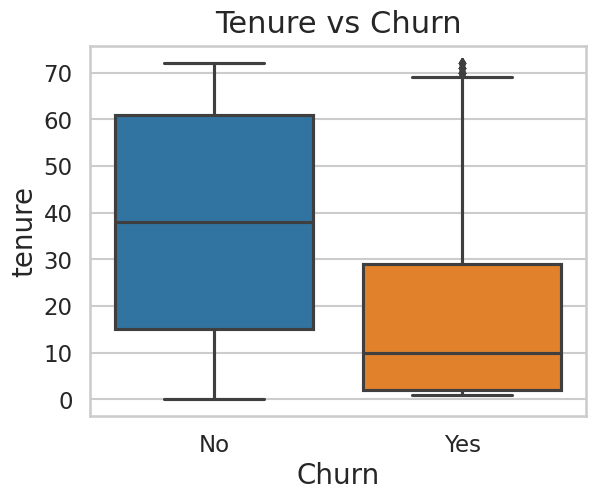

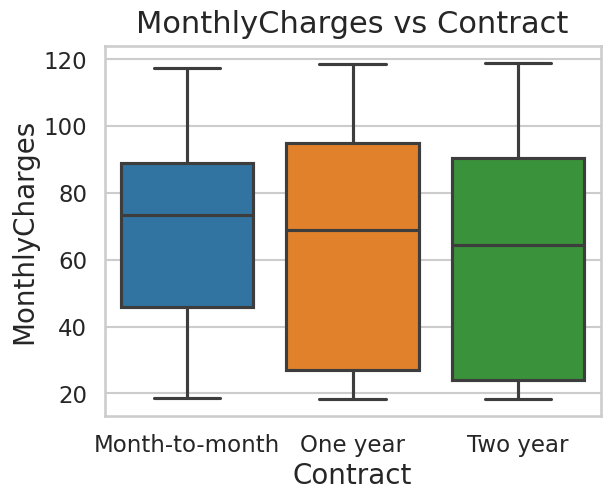

In [57]:
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/telecom-dataset/telco.csv')

# Creating a box plot for Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# Creating a box plot for MonthlyCharges vs Contract
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Contract')
plt.show()

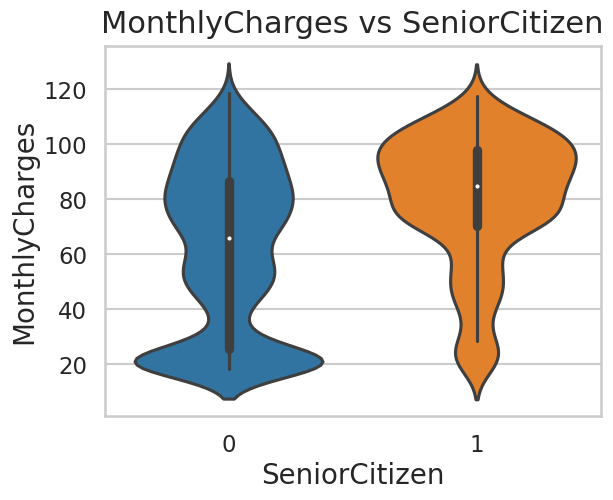

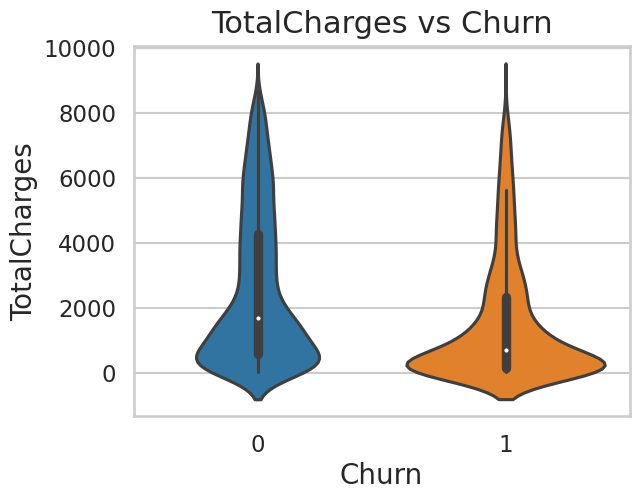

In [62]:
sns.violinplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs SeniorCitizen')
plt.show()

# Creating a violin plot for TotalCharges vs Contract
sns.violinplot(x='Churn', y='TotalCharges', data=dfcopy)
plt.title('TotalCharges vs Churn')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

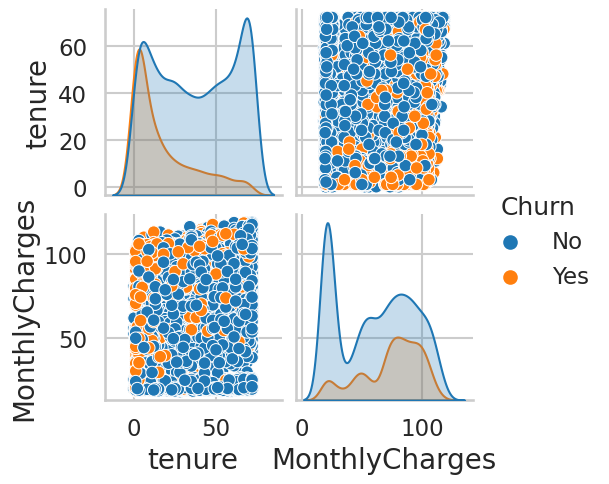

In [74]:
sns.pairplot(df, vars=['tenure', 'MonthlyCharges'], hue='Churn')
plt.show()